In [2]:
import tensorflow as tf
import numpy as np

Lo primero que vamos a hacer es tener dos arrays, uno con los grados en celsius y otro con los grados en Fahrenheit.

In [22]:
import random

#crear array de 1000 componentes con valores entre -40 y 40 de tipo float

c= []
f=[]
for i in range(0,50000):
 c.append(random.randint(-40,40))
 f.append((c[i]* 9.0/5.0)+32)

celsius =    np.array(c, dtype=float)

#crear un array de 1000 componentes pasando los celsius a fahrenheit
#(celsius × 9 / 5) + 32 = x fahrenheit
fahrenheit = np.array(f, dtype=float)


Se va a crear la estructura de la red neuronal con dos capas ocultas, con 3 neuronas, y una de salida.

In [4]:
modelo = tf.keras.Sequential([tf.keras.layers.Dense(1000, input_shape=(1,)),
                              tf.keras.layers.Dense(200,activation='selu', kernel_initializer='he_uniform'),
                              tf.keras.layers.Dense(1)])


In [5]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='mean_squared_error'
)

In [10]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit,
                       epochs=5,
                       verbose=True,
                       batch_size=10000,
                       validation_split=0.1)

print("Modelo entrenado!")



Comenzando entrenamiento...
Epoch 1/5
5/5 [==============================] - 2s 361ms/step - loss: 0.0114 - val_loss: 0.0112
Epoch 2/5
5/5 [==============================] - 1s 262ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 3/5
5/5 [==============================] - 1s 250ms/step - loss: 0.0112 - val_loss: 0.0110
Epoch 4/5
5/5 [==============================] - 1s 263ms/step - loss: 0.0111 - val_loss: 0.0109
Epoch 5/5
5/5 [==============================] - 1s 255ms/step - loss: 0.0110 - val_loss: 0.0108
Modelo entrenado!


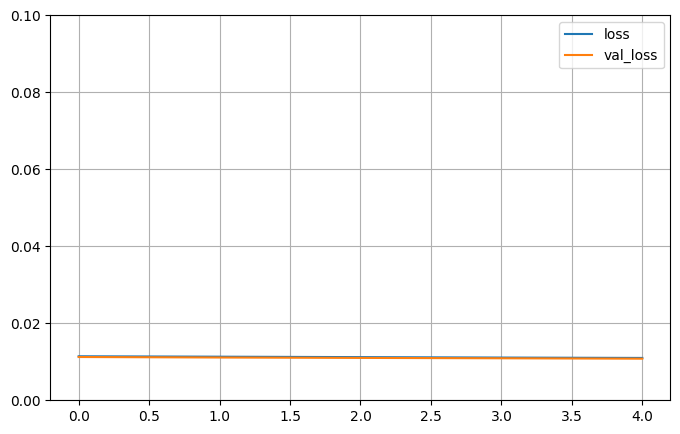

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(historial.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,0.1) #el rango vertical
plt.show()

In [21]:
print("Hagamos una predicción!")
resultado = modelo.predict([120])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 [==============================] - 0s 52ms/step
El resultado es [[247.19516]] fahrenheit!


In [23]:
from sklearn.metrics import mean_squared_error

#mean_squared_error([-28, -6, 2, 35, -32, -22, 1, -23, -9, 1, -6, -18, 31, -38, 19],
#                   [-18.4, 21.2, 35.6, 95.0, -25.6, -7.600000000000001, 33.8, -9.399999999999999, 15.8, 33.8, 21.2, -0.3999999999999986, 87.8, -36.400000000000006, 66.2]
#)

mean_squared_error(fahrenheit, modelo.predict(celsius))


1563/1563 [==============================] - 4s 2ms/step


0.011159967142614038

In [ ]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.07909957, -0.6309226 , -0.29202503,  0.00434983, -0.20145857,
         0.21760763,  0.12286334, -0.18601505, -0.04716257, -0.32724053,
        -0.5244792 , -0.6037708 , -0.42555377,  0.4108264 , -0.06972949,
         0.35222557]], dtype=float32), array([-2.419014  , -1.9018198 , -1.4346596 , -2.1102333 , -1.9926628 ,
        2.0940068 ,  1.6602478 ,  1.2734274 ,  0.10968605,  3.0159526 ,
       -1.9129875 , -1.88445   , -1.83389   ,  2.1338463 ,  0.97319496,
        1.9699138 ], dtype=float32)]
[array([[-0.8329874 ,  0.4252717 ,  0.6024132 ],
       [-0.62244016,  0.17669384,  0.35801658],
       [-0.05933455,  0.66347486,  0.525156  ],
       [-1.2539641 ,  0.9177586 ,  1.3211563 ],
       [-1.1347209 ,  0.33562368,  1.0411959 ],
       [ 0.42525938, -0.1803199 , -0.67193556],
       [ 0.6035961 ,  0.25694957, -0.61225563],
       [ 0.5247414 , -0.36467785, -0.41990888],
       [-0.05958135, -0.20565583, -0.65077746],
       [ 2.0893855 , -0.4